In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [3]:
light1=np.asarray([0,0,40]);
light2=np.asarray([20,5,40]);
light3=np.asarray([-5,15,40]);
light4=np.asarray([-10,-10,40]);
light5=np.asarray([5,-10,40]);
light6=np.asarray([5,20,40]);
print(light1,light2)

[ 0  0 40] [20  5 40]


In [4]:
light1 = light1 / np.linalg.norm(light1);
light2 = light2 / np.linalg.norm(light2);
light3 = light3 / np.linalg.norm(light3);
light4 = light4 / np.linalg.norm(light4);
light5 = light5 / np.linalg.norm(light5);
light6 = light6 / np.linalg.norm(light6);
print(light1,light2)

[0. 0. 1.] [0.44444444 0.11111111 0.88888889]


In [5]:
img1 = plt.imread('s_ss1.bmp');
img2 = plt.imread('s_ss2.bmp');
img3 = plt.imread('s_ss3.bmp');
img4 = plt.imread('s_ss4.bmp');
img5 = plt.imread('s_ss5.bmp');
img6 = plt.imread('s_ss6.bmp');

In [6]:
S= np.asarray([light1,light2 ,light3, light4, light5, light6])

b=np.ones((240, 320,3),dtype=float)
#b.astype(float)
#print(b)

In [7]:
p=np.ones((240, 320),dtype=float)
q=p;
Z=np.ones((240, 320),dtype=float)

In [8]:
for i in range(240):
    for j in range(320):

        
        E=np.asarray([img1[i,j],img2[i,j],img3[i,j],img4[i,j],img5[i,j],img6[i,j]])
        E=E.transpose()
        E.astype(float)
        
        tb= np.dot((np.linalg.inv(np.dot(S.transpose(),S))),np.dot(S.transpose(),E));
        
        nbm = np.linalg.norm(tb);
        if( nbm == 0):
            b[i,j,:] = 0; 
        else:
            b[i,j,:] = tb / nbm;
        
        tM = [b[i,j,0],b[i,j,1],b[i,j,2]]
        nbm = np.linalg.norm(tM);
        if( nbm == 0):
            tM = [0,0,0];
        else:
            tM = tM / nbm; 
        
        p[i,j]=np.asarray(tM[0]);
        q[i,j]=np.asarray(tM[1]);

In [41]:
for i in range(240):
    for j in range(320):
        Z[i,j] = sum(q[0:i, 0]) + sum(p[i,0:j]);

Z = Z*-1;

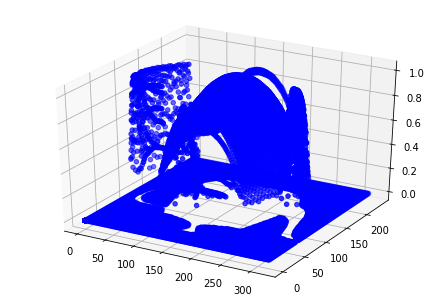

In [39]:
fig = pylab.figure()
ax = Axes3D(fig)
def plot3(a,b,c,mark="o",col="b"):
  pylab.ion()
  ax.scatter(a, b, c,marker=mark,color=col,linewidth=1)
  #ax.plot_wireframe(a,b,c)

xi = np.zeros((240,320))
yi = np.zeros((240,320))
zi = np.zeros((240,320))
for i in range(0,240,2):
    for j in range(0,320,2):
        xi[i,j] = j+b[i,j,0] 
        yi[i,j] = i+b[i,j,1]
        zi[i,j] = b[i,j,2]
        #plot3(j+b[i,j,0],i+b[i,j,1],b[i,j,2])
plot3(xi,yi,zi)

[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [237 237 237 ... 237 237 237]
 [238 238 238 ... 238 238 238]
 [239 239 239 ... 239 239 239]] [[  0   1   2 ... 317 318 319]
 [  0   1   2 ... 317 318 319]
 [  0   1   2 ... 317 318 319]
 ...
 [  0   1   2 ... 317 318 319]
 [  0   1   2 ... 317 318 319]
 [  0   1   2 ... 317 318 319]]
(240, 320)


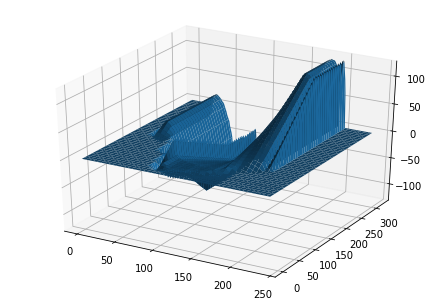

In [42]:
fig1 = pylab.figure()
ax = Axes3D(fig1)
#ax.plot_surface(Z);
x,y = np.mgrid[0:240:1,0:320:1]
print(x,y)
print(Z.shape)
ax.plot_surface(x,y,Z);